In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as s
import matplotlib.pyplot as plt
#sns.set(style = 'whitegrid')
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")
data.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,...,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,...,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,05-02-1997,IL,100/300,500,1442.99,0,601734,...,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,...,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN


In [3]:
data.shape

(1000, 40)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [5]:
data=data.drop(['_c39'],axis=1)

In [6]:
data.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [7]:
data['police_report_available'].unique()

array(['YES', '?', 'NO'], dtype=object)

In [8]:
data['policy_state'].unique()

array(['OH', 'IN', 'IL'], dtype=object)

In [9]:
data.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [10]:
data=data.drop(['policy_number','incident_location'],axis=1)

In [11]:
data.shape

(1000, 37)

In [12]:
data.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


N    753
Y    247
Name: fraud_reported, dtype: int64

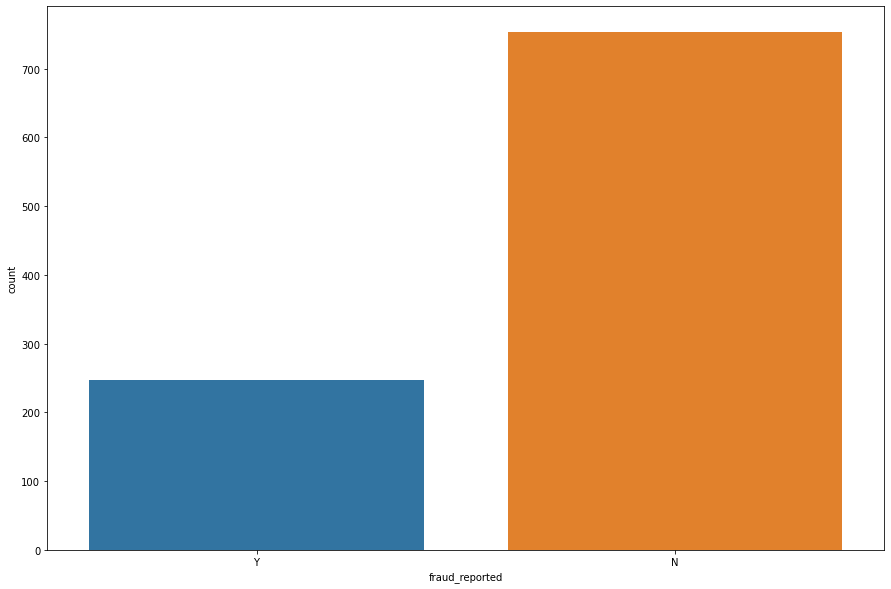

In [13]:
plt.figure(figsize=(15,10))
sns.countplot(data['fraud_reported'])
data['fraud_reported'].value_counts()

In [14]:
# we can see some missing values denoted by '?' so lets replace missing values with np.nan

data.replace('?', np.nan, inplace = True)


In [15]:
data.isna().sum()

months_as_customer               0
age                              0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_availa

In [16]:
data['collision_type'] = data['collision_type'].fillna(data['collision_type'].mode()[0])


In [17]:
data['property_damage'] = data['property_damage'].fillna(data['property_damage'].mode()[0])


In [18]:
data['police_report_available'] = data['police_report_available'].fillna(data['police_report_available'].mode()[0])


In [19]:
data.isna().sum()


months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_cla

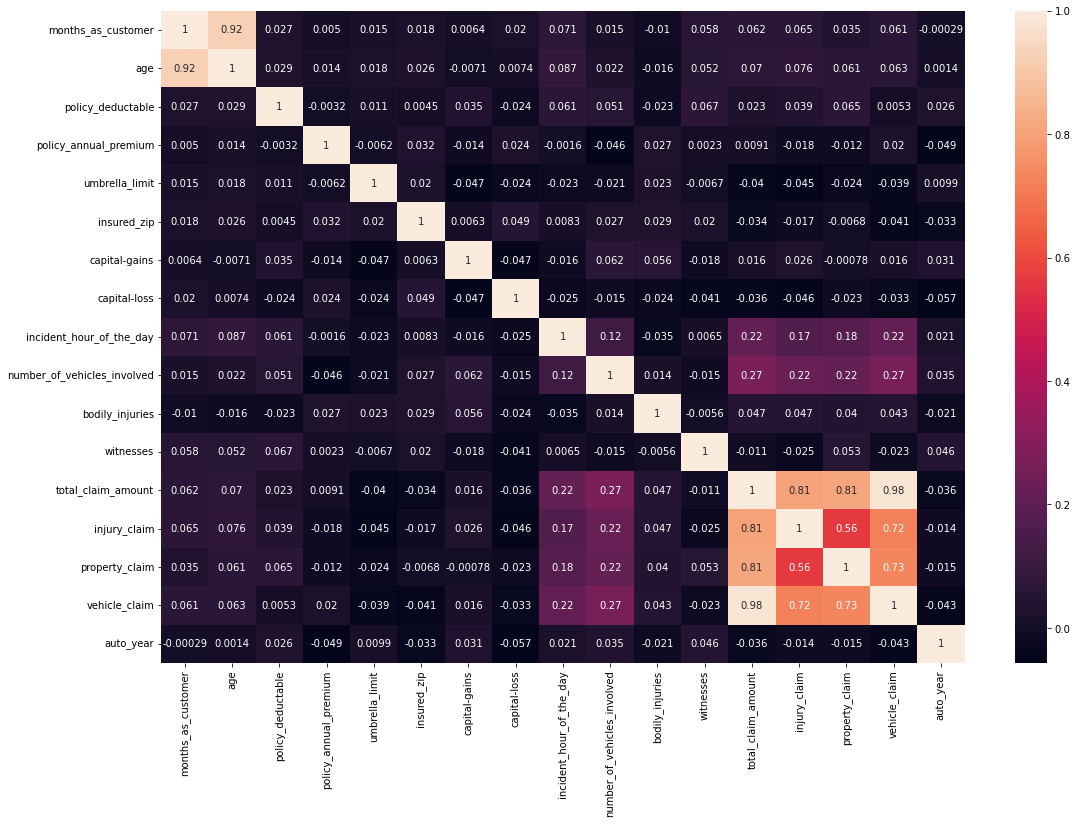

In [20]:
# heatmap

plt.figure(figsize = (18, 12))

corr = data.corr()

sns.heatmap(data = corr, annot = True)
plt.show()


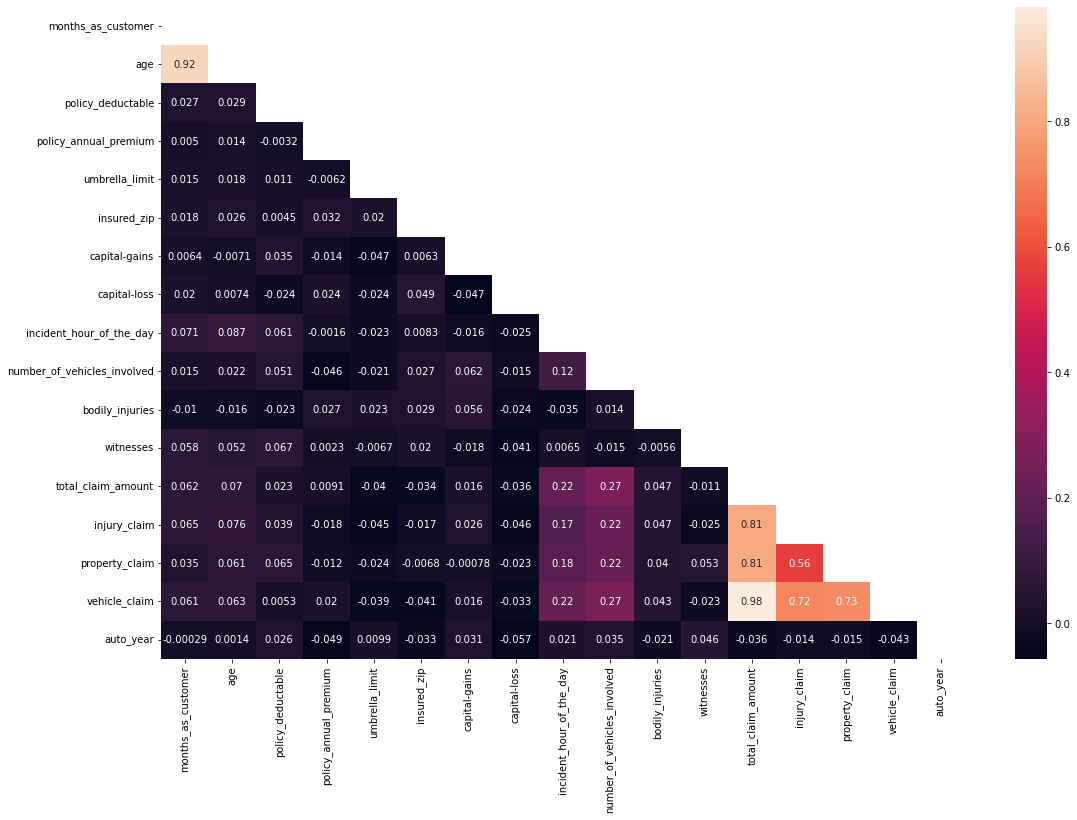

In [21]:
# checking for multicollinearity

plt.figure(figsize = (18, 12))

corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask = mask, annot = True)
plt.show()


From the above plot, we can see that there is high correlation between age and months_as_customer.We will drop the "Age" column. Also there is high correlation between total_clam_amount, injury_claim, property_claim, vehicle_claim as total claim is the sum of all others. So we will drop the total claim column.



In [22]:
data.drop(columns = ['age'], inplace = True, axis = 1)


In [23]:
data.head()

,months_as_customer,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [24]:
claims_df = data[[ 'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim']]
claims_df

,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,71610,6510,13020,52080
1,5070,780,780,3510
2,34650,7700,3850,23100
3,63400,6340,6340,50720
4,6500,1300,650,4550
...,...,...,...,...
995,87200,17440,8720,61040
996,108480,18080,18080,72320
997,67500,7500,7500,52500
998,46980,5220,5220,36540


In [25]:
claims_sum = claims_df.sum()
claims_sum


total_claim_amount    52761940
injury_claim           7433420
property_claim         7399570
vehicle_claim         37928950
dtype: int64

In [26]:
claims_sum[0] == sum(claims_sum[1:])


True

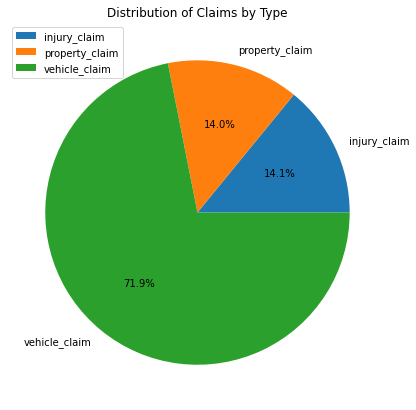

In [27]:
plt.figure(figsize = (12,7))
plt.title('Distribution of Claims by Type')
plt.pie(claims_sum[1:], labels = claims_sum[1:].index, autopct = '%1.1f%%')
plt.legend(loc = 'upper left');


In [28]:
No_of_vehicles_involved = data.number_of_vehicles_involved.value_counts()
No_of_vehicles_involved


1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64

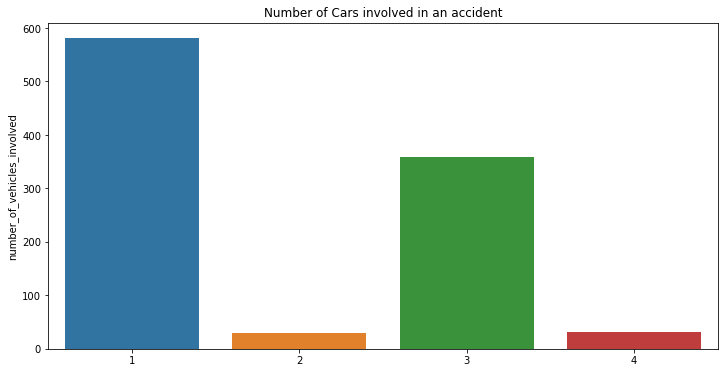

In [29]:
plt.figure(figsize=(12,6))
plt.title('Number of Cars involved in an accident')
sns.barplot(x=No_of_vehicles_involved.index, y=No_of_vehicles_involved);


Most accidents involve 1 car followed by 3. Accidents involving 2 or 4 cars seem to be a rare occurence



In [30]:
data.groupby('auto_model')[['total_claim_amount']].mean().sort_values('total_claim_amount', ascending = False).rename(columns = {'total_claim_amount' : 'mean_claim_amount'})


,mean_claim_amount
auto_model,
X6,66480.625000
Escape,63865.000000
C300,61640.000000
RSX,60902.500000
ML350,59545.500000
Forrestor,59542.500000
Fusion,57632.857143
CRV,56960.500000
RAM,56920.930233


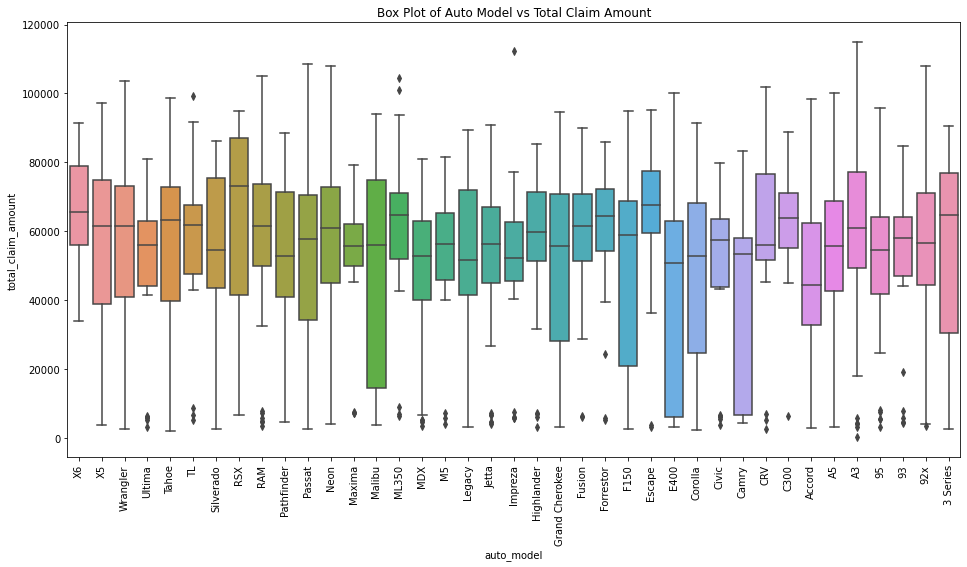

In [31]:
plt.figure(figsize=(16, 8))

my_order = data.groupby(by=["auto_model"])["total_claim_amount"].median().iloc[::-1].index

sns.boxplot(x = 'auto_model', y = 'total_claim_amount' ,data = data, order = my_order).set(title = 'Box Plot of Auto Model vs Total Claim Amount')
plt.xticks(rotation = 90);


In [32]:
State_claims = data.groupby('incident_state')[['total_claim_amount']].sum().sort_values('total_claim_amount', ascending = False)
State_claims


,total_claim_amount
incident_state,
NY,14773770
SC,13538150
WV,10897150
VA,5499770
NC,5421230
PA,1487150
OH,1144720


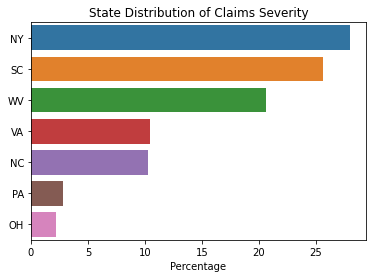

In [33]:
State_claims_pct = State_claims.total_claim_amount * 100/ State_claims.total_claim_amount.sum()

sns.barplot(x=State_claims_pct, y=State_claims_pct.index)

plt.title('State Distribution of Claims Severity')
plt.ylabel(None);
plt.xlabel('Percentage');


New York is leading with the most claims at 28% i.e. $14.7M. Let's save and upload our work before continuing.



In [34]:
#checking no. of each type of feature:

numerical_feature = [feature for feature in data.columns if data[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(data[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in data.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 16
Discrete feature Count 7
Continuous feature Count 9
Categorical feature Count 20


In [35]:
print(discrete_feature)

['policy_deductable', 'umbrella_limit', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'auto_year']


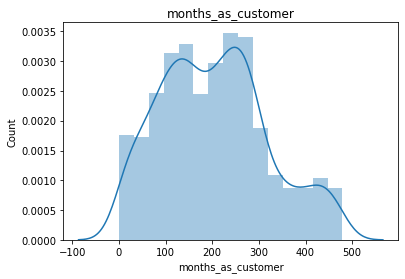

<Figure size 1080x1080 with 0 Axes>

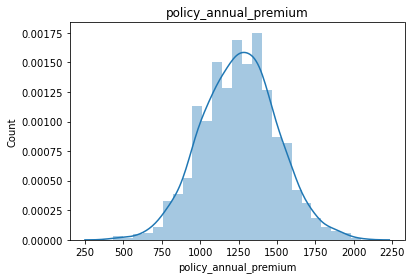

<Figure size 1080x1080 with 0 Axes>

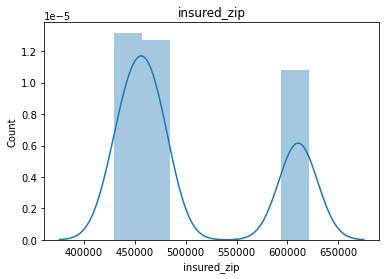

<Figure size 1080x1080 with 0 Axes>

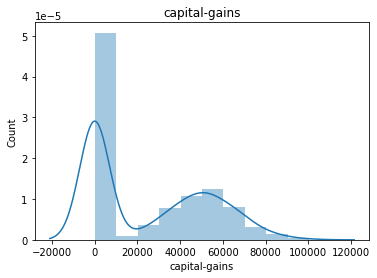

<Figure size 1080x1080 with 0 Axes>

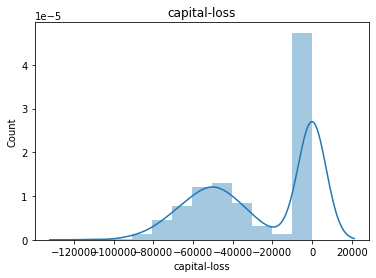

<Figure size 1080x1080 with 0 Axes>

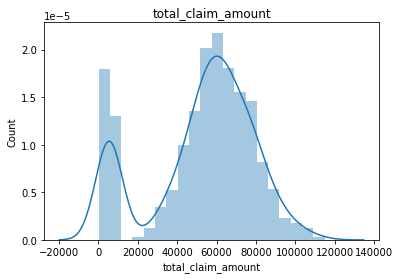

<Figure size 1080x1080 with 0 Axes>

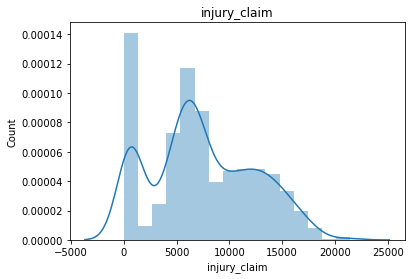

<Figure size 1080x1080 with 0 Axes>

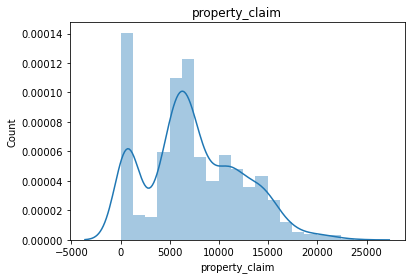

<Figure size 1080x1080 with 0 Axes>

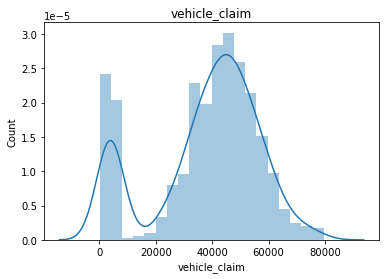

<Figure size 1080x1080 with 0 Axes>

In [36]:
for feature in continuous_feature:
    data=data.copy()
    sns.distplot(data[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

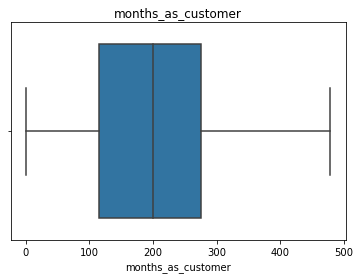

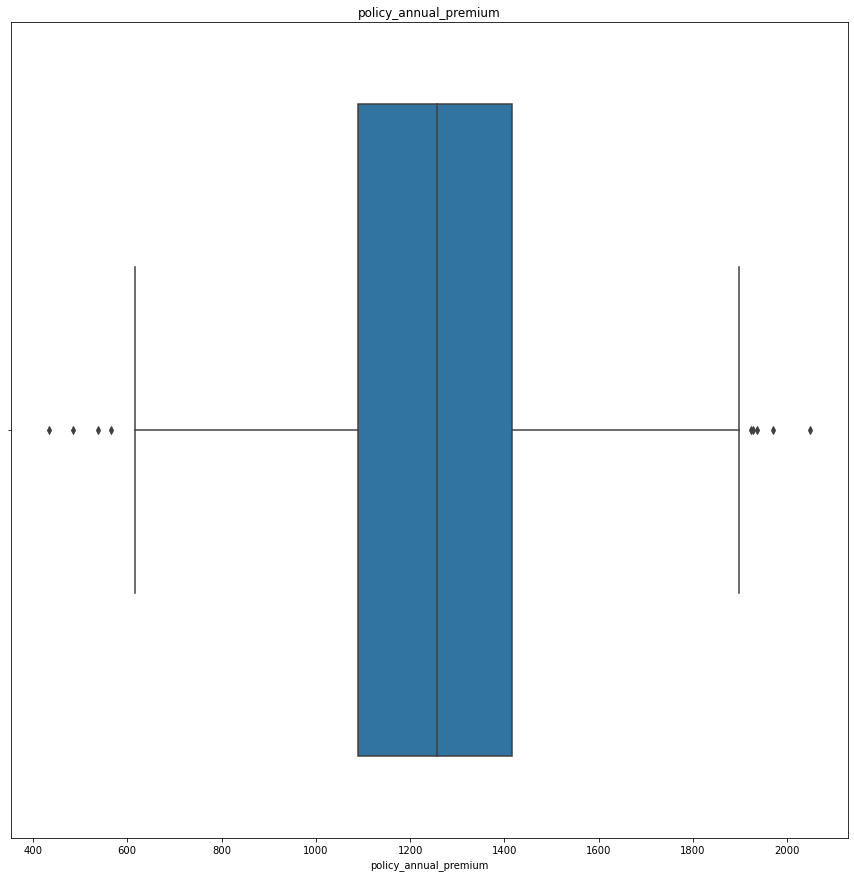

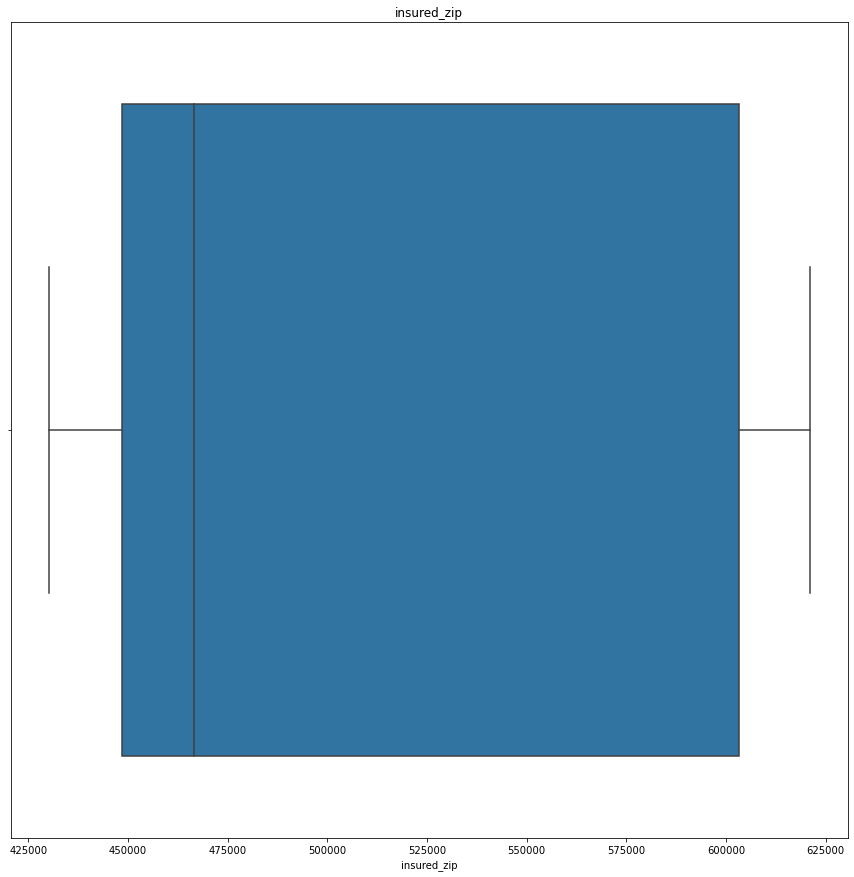

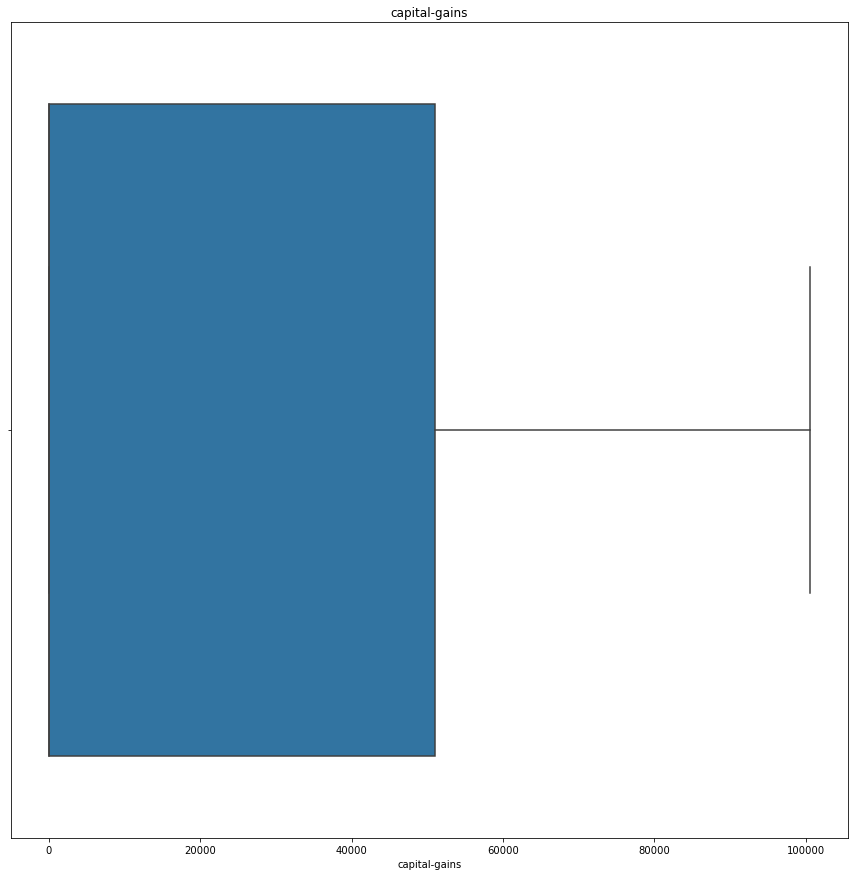

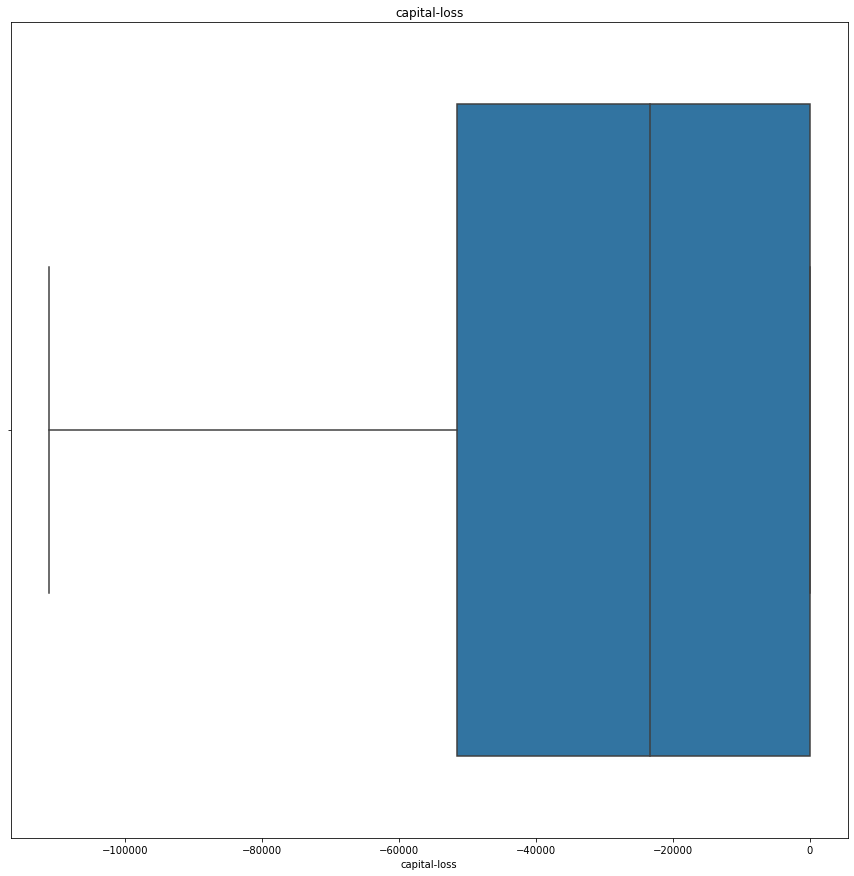

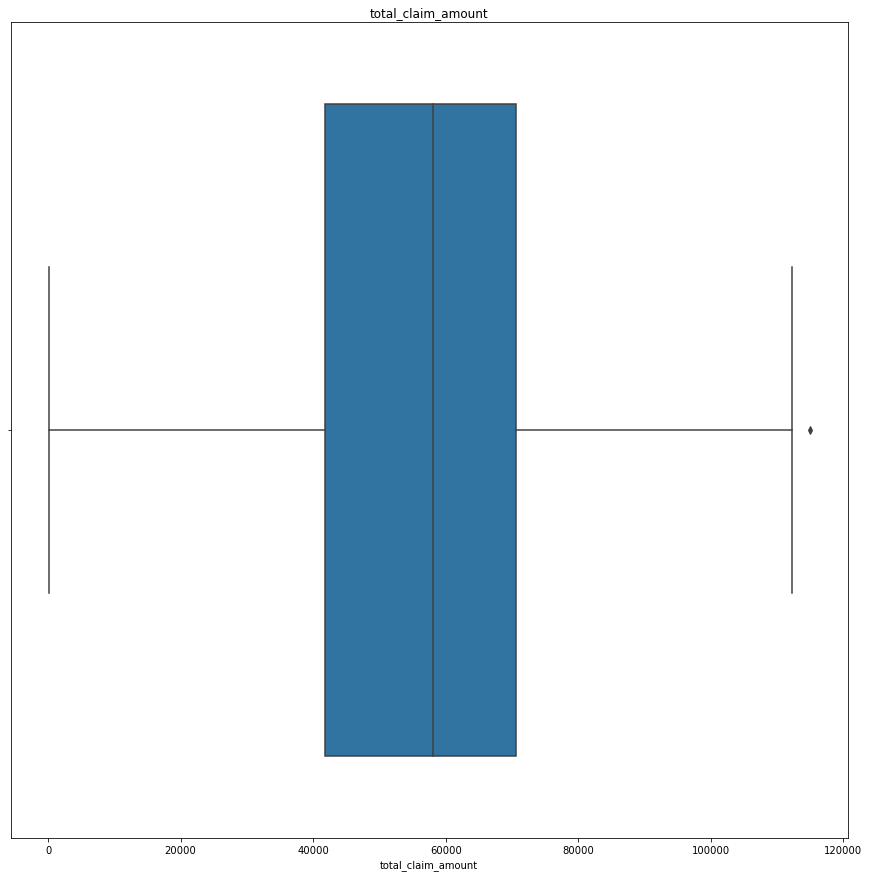

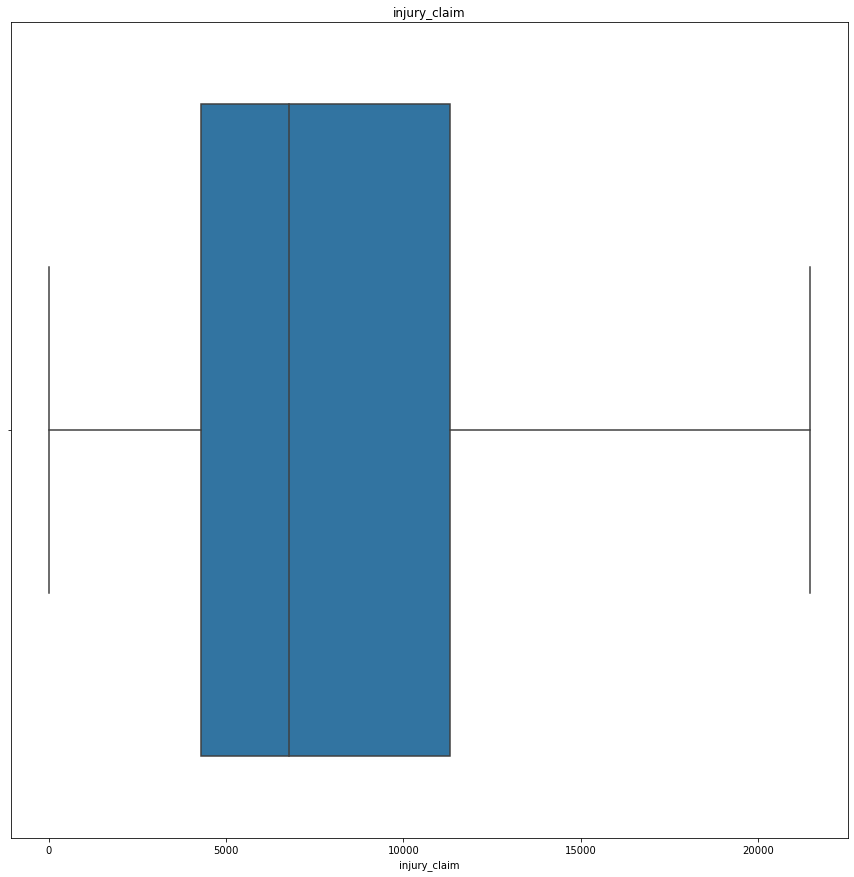

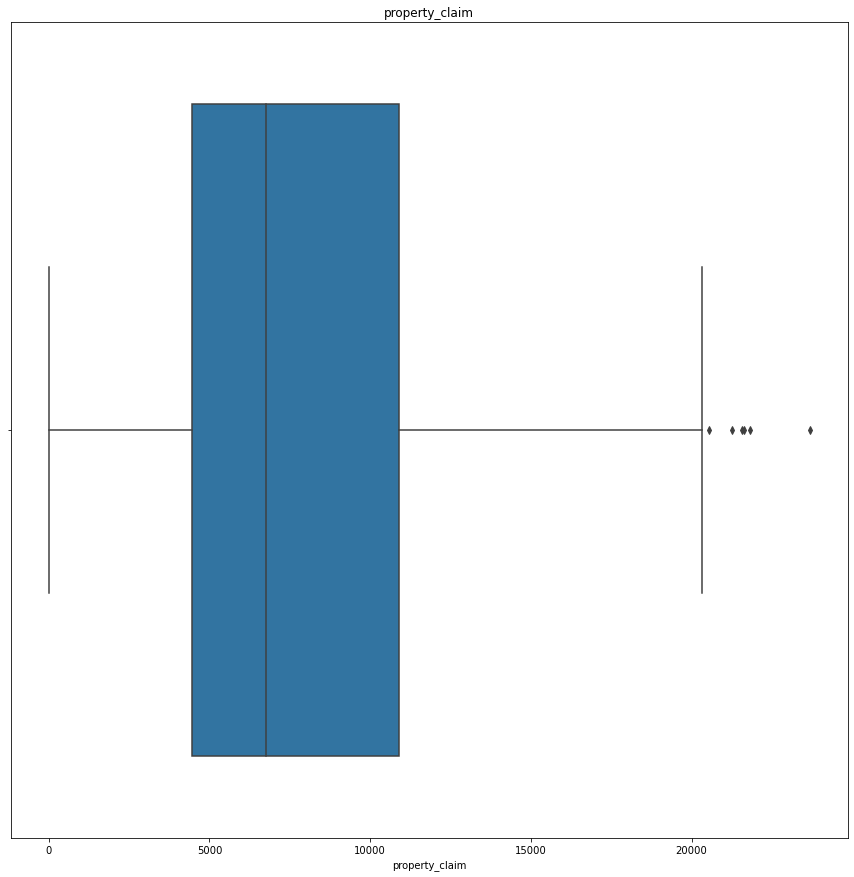

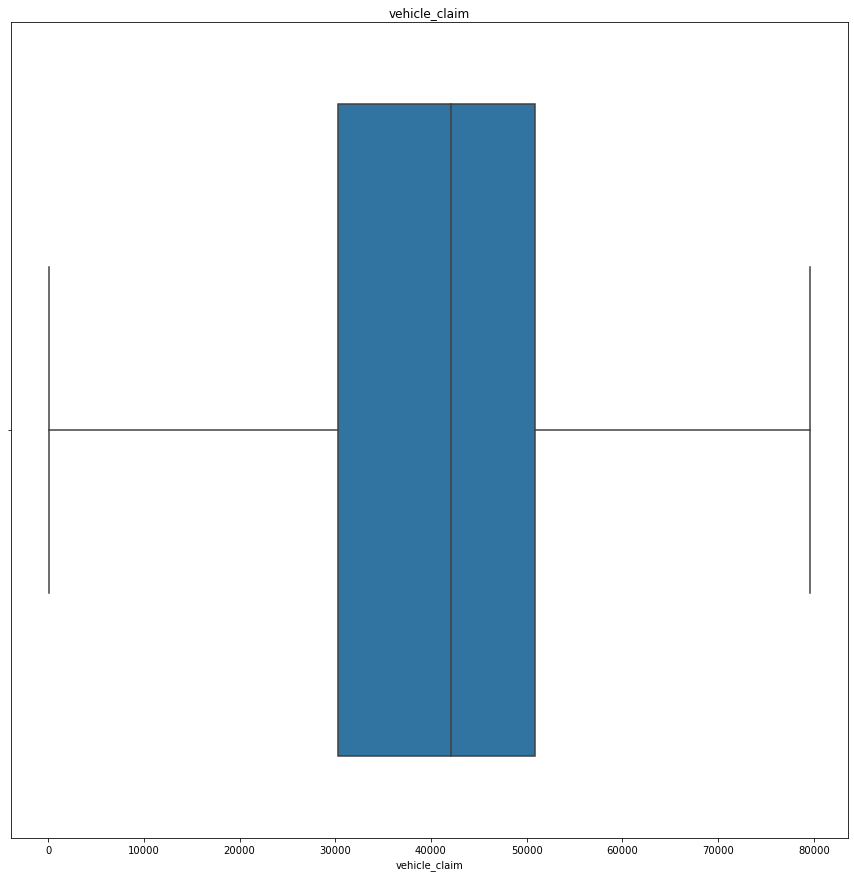

<Figure size 1080x1080 with 0 Axes>

In [37]:
#A for loop is used to plot a boxplot for all the continuous features to see the outliers
for feature in continuous_feature:
    data=data.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [38]:
IQR=data.policy_annual_premium.quantile(0.75)-data.policy_annual_premium.quantile(0.25)
lower_bridge=data.policy_annual_premium.quantile(0.25)-(IQR*1.5)
upper_bridge=data.policy_annual_premium.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

600.4762499999999 1904.8262500000003


In [39]:
data.loc[data['policy_annual_premium']>=1904.82,'policy_annual_premium']=1904.8
data.loc[data['policy_annual_premium']<=600.47,'policy_annual_premium']=600.47

In [40]:
IQR=data.property_claim.quantile(0.75)-data.property_claim.quantile(0.25)
lower_bridge=data.property_claim.quantile(0.25)-(IQR*1.5)
upper_bridge=data.property_claim.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-5215.0 20545.0


In [41]:
data.loc[data['property_claim']>=20545,'property_claim']=20545

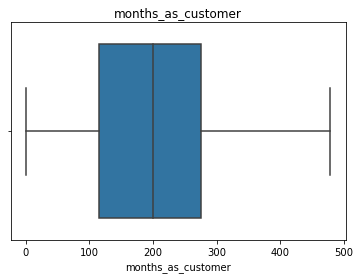

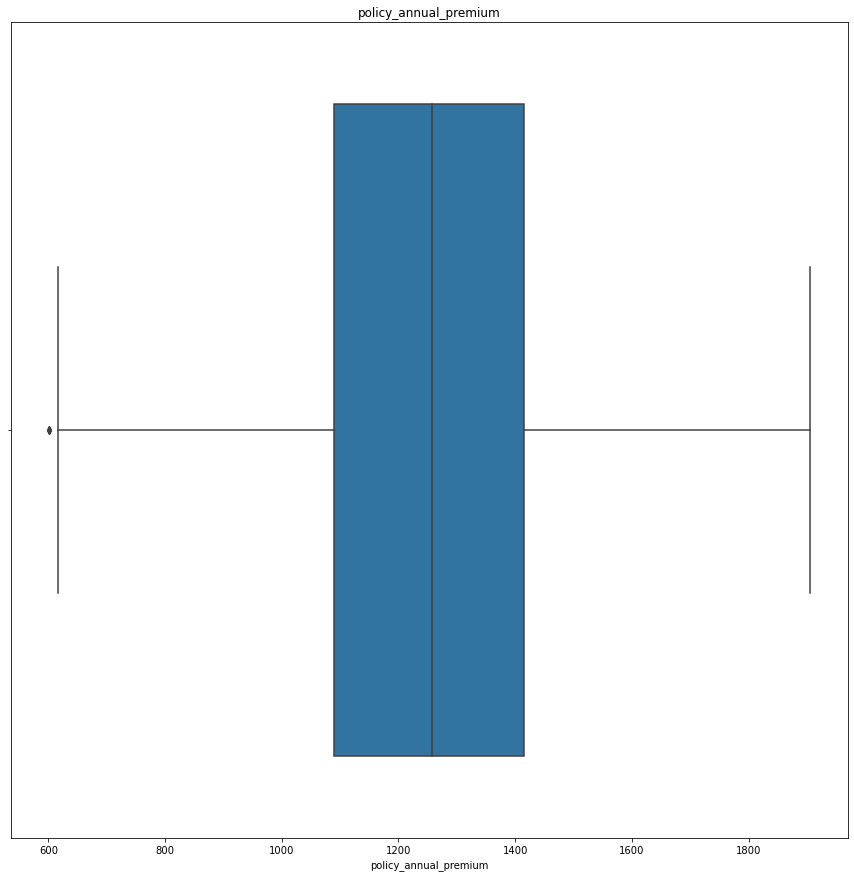

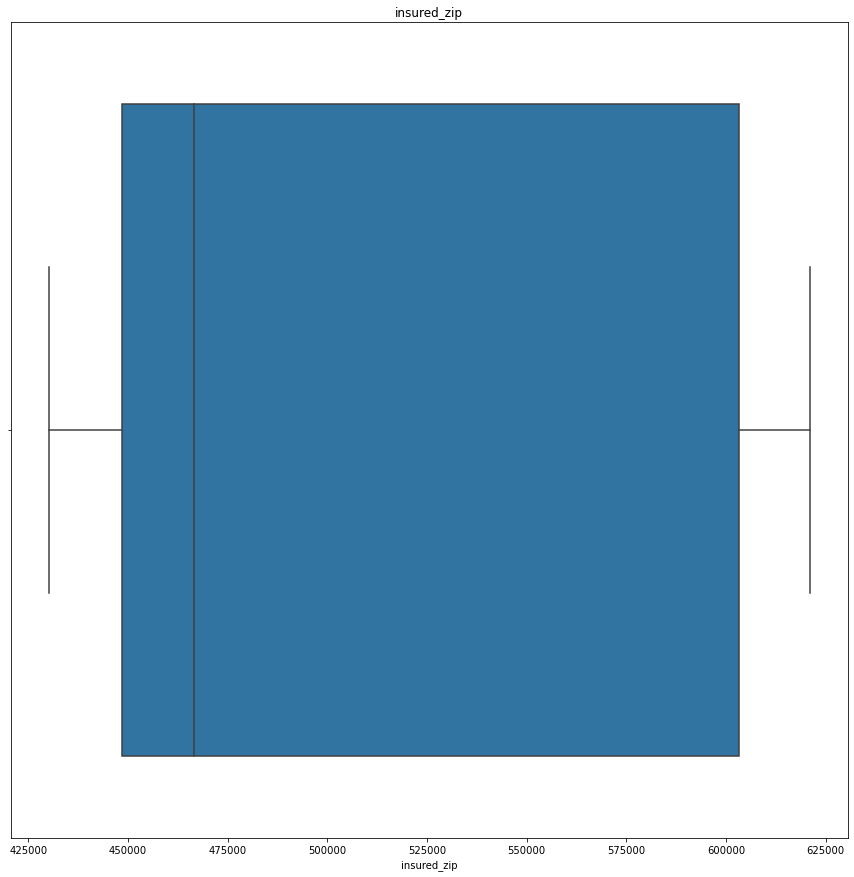

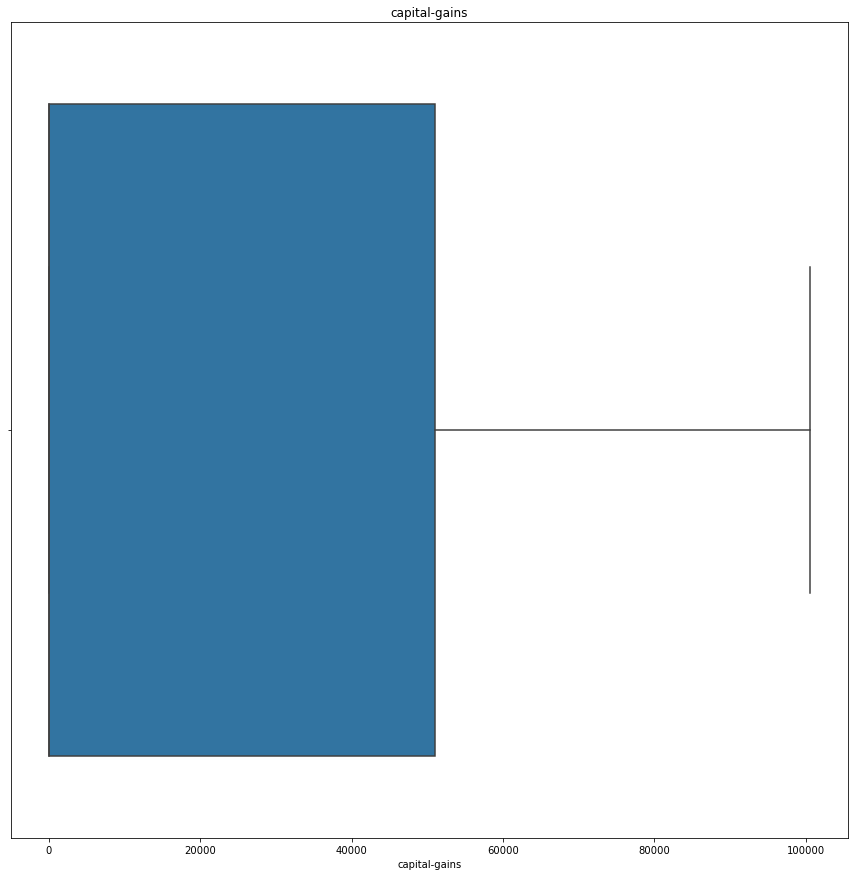

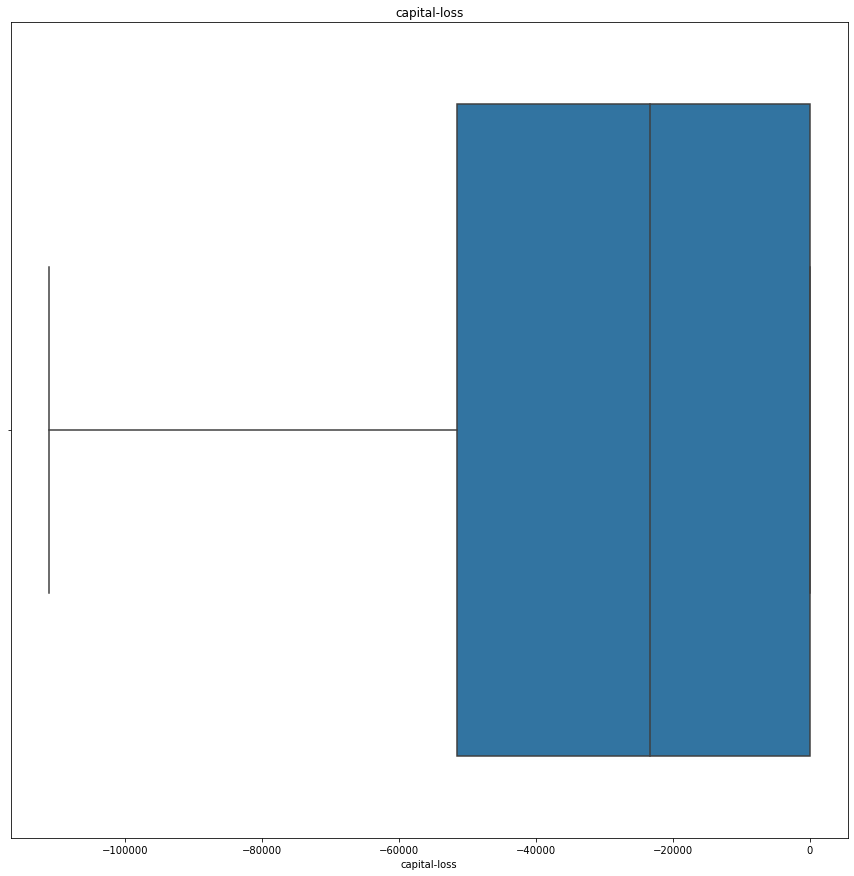

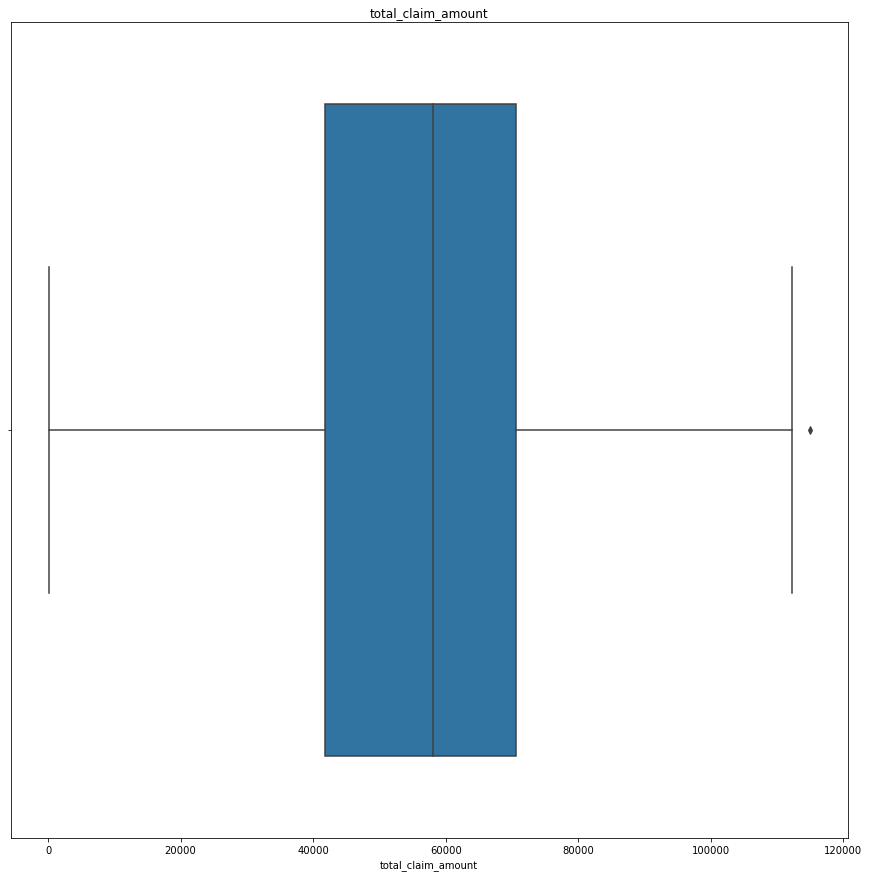

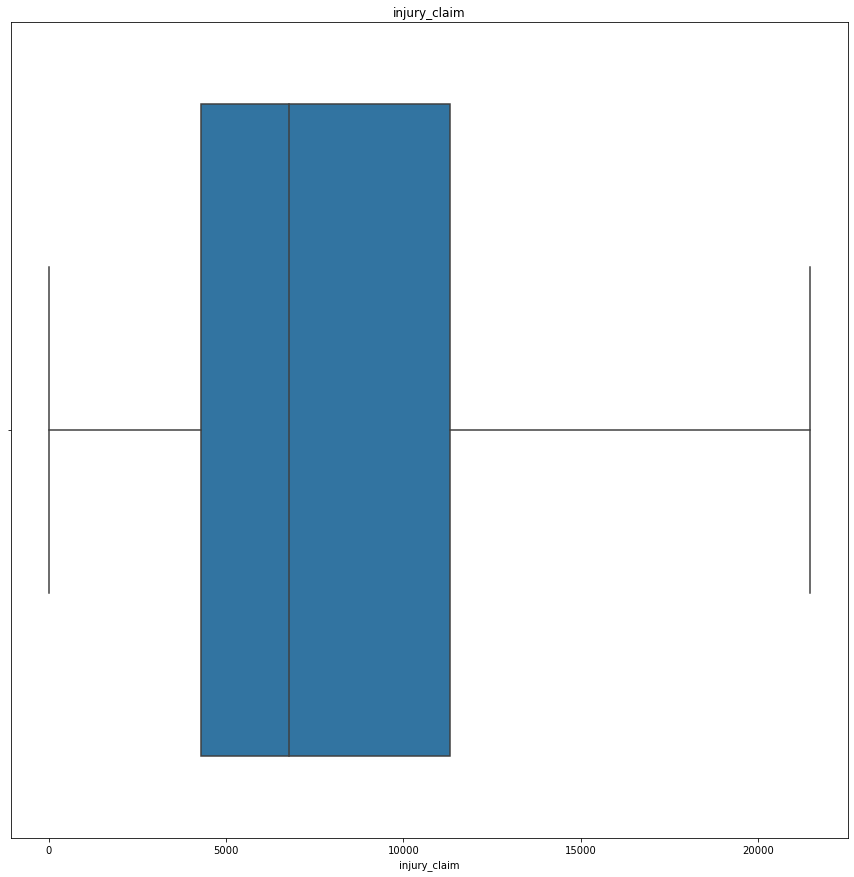

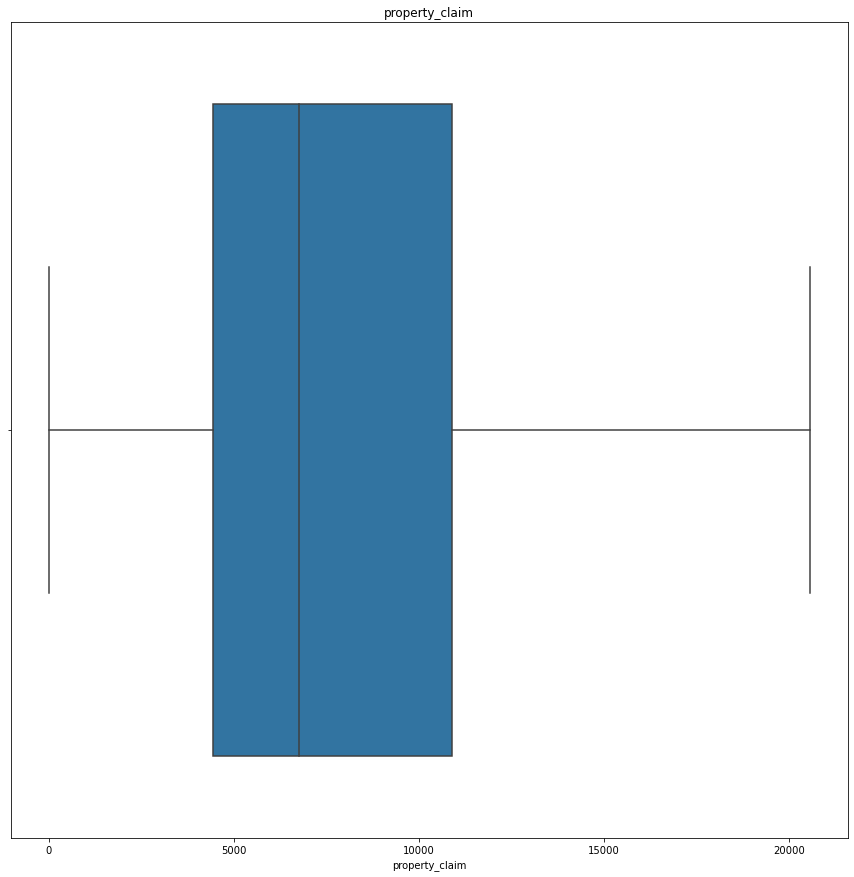

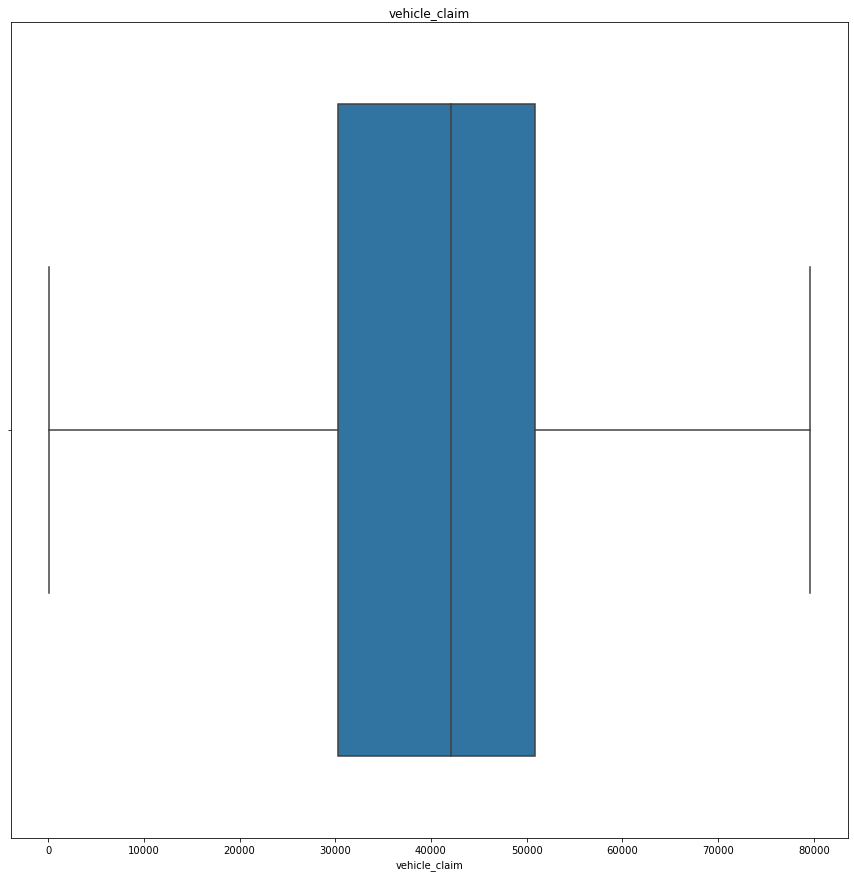

<Figure size 1080x1080 with 0 Axes>

In [42]:
#A for loop is used to plot a boxplot for all the continuous features to see the outliers
for feature in continuous_feature:
    data=data.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [43]:
data["fraud_reported"] = pd.get_dummies(data["fraud_reported"], drop_first = True)


In [44]:
# separating the feature and target columns

X = data.drop('fraud_reported', axis = 1)
y = data['fraud_reported']



In [45]:
# extracting categorical columns
cat_df = X.select_dtypes(include = ['object'])


In [46]:
cat_df.head()


,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model
0,17-10-2014,OH,250/500,MALE,MD,craft-repair,sleeping,husband,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,YES,YES,Saab,92x
1,27-06-2006,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,21-01-2015,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,NO,NO,Mercedes,E400
2,06-09-2000,OH,100/300,FEMALE,PhD,sales,board-games,own-child,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,NO,NO,Dodge,RAM
3,25-05-1990,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,NO,NO,Chevrolet,Tahoe
4,06-06-2014,IL,500/1000,MALE,Associate,sales,board-games,unmarried,17-02-2015,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,NO,NO,Accura,RSX


In [47]:
# printing unique values of each column
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")


policy_bind_date: 
['17-10-2014' '27-06-2006' '06-09-2000' '25-05-1990' '06-06-2014'
 '12-10-2006' '04-06-2000' '03-02-1990' '05-02-1997' '25-07-2011'
 '26-05-2002' '29-05-1999' '20-11-1997' '26-10-2012' '28-12-1998'
 '19-10-1992' '08-06-2005' '15-11-2004' '28-12-2014' '02-08-1992'
 '25-06-2002' '27-11-2005' '27-05-1994' '08-02-1991' '02-02-1996'
 '05-12-2013' '20-09-1990' '18-07-2002' '08-02-1990' '04-03-2014'
 '18-02-2000' '19-06-2008' '01-08-2003' '04-04-1992' '13-01-1991'
 '08-08-2010' '09-03-2003' '03-02-1993' '25-11-2002' '27-07-1997'
 '08-05-1995' '30-08-2012' '30-04-2006' '13-04-2003' '05-12-2007'
 '21-08-2006' '08-01-1990' '18-03-1990' '07-01-2008' '10-03-1997'
 '10-01-2004' '20-08-1994' '02-06-2002' '28-04-1994' '17-08-2014'
 '11-08-2007' '20-11-2008' '18-10-1995' '19-05-1993' '26-02-2005'
 '14-02-1990' '30-09-1993' '10-06-2014' '28-10-2008' '24-04-2007'
 '13-12-1993' '17-08-2011' '20-08-1990' '11-02-1994' '22-02-1994'
 '15-08-2011' '11-11-1998' '04-12-1995' '28-12-2002' '15-

In [48]:
cat_df = pd.get_dummies(cat_df, drop_first = True)


In [49]:
cat_df.head()


,policy_bind_date_01-01-2008,policy_bind_date_01-02-1990,policy_bind_date_01-02-1998,policy_bind_date_01-02-2011,policy_bind_date_01-03-1991,policy_bind_date_01-03-1997,policy_bind_date_01-03-2002,policy_bind_date_01-03-2010,policy_bind_date_01-03-2012,policy_bind_date_01-04-1994,...,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [50]:
# extracting the numerical columns

num_df = X.select_dtypes(include = ['int64'])


In [51]:
num_df.head()


,months_as_customer,policy_deductable,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
0,328,1000,0,466132,53300,0,5,1,1,2,71610,6510,13020,52080,2004
1,228,2000,5000000,468176,0,0,8,1,0,0,5070,780,780,3510,2007
2,134,2000,5000000,430632,35100,0,7,3,2,3,34650,7700,3850,23100,2007
3,256,2000,6000000,608117,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014
4,228,1000,6000000,610706,66000,-46000,20,1,0,1,6500,1300,650,4550,2009


In [52]:
# combining the Numerical and Categorical dataframes to get the final dataset

X = pd.concat([num_df, cat_df], axis = 1)


In [53]:
X.head()


,months_as_customer,policy_deductable,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,328,1000,0,466132,53300,0,5,1,1,2,...,0,0,0,0,0,0,0,0,0,0
1,228,2000,5000000,468176,0,0,8,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,134,2000,5000000,430632,35100,0,7,3,2,3,...,0,1,0,0,0,0,0,0,0,0
3,256,2000,6000000,608117,48900,-62400,5,1,1,2,...,0,0,0,0,0,1,0,0,0,0
4,228,1000,6000000,610706,66000,-46000,20,1,0,1,...,0,0,1,0,0,0,0,0,0,0


In [54]:
# splitting data into training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


In [55]:
X_train.head()


,months_as_customer,policy_deductable,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
361,61,500,0,473611,47400,0,15,3,2,1,...,0,0,0,0,0,0,0,0,0,0
364,291,1000,0,452701,0,-55300,8,1,2,2,...,0,0,0,0,0,0,0,0,0,0
145,398,500,0,469429,0,-57900,18,1,2,1,...,0,0,0,0,1,0,0,0,0,0
936,204,1000,7000000,447976,44000,-20800,6,1,1,0,...,0,0,0,0,0,0,0,0,0,0
248,101,1000,0,603269,25900,0,7,1,0,3,...,0,0,0,0,0,0,0,0,0,0


In [56]:
num_df = X_train[['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']]


In [57]:
# Scaling the numeric values in the dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df)


In [58]:
scaled_num_df = pd.DataFrame(data = scaled_data, columns = num_df.columns, index = X_train.index)
scaled_num_df.head()


,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
361,-1.226809,-1.037580,-0.477057,0.826395,0.952771,0.492359,1.124828,1.260791,-0.439581,0.391874,0.421398,0.472464
364,0.779568,-0.212357,-0.477057,-0.868190,-1.004687,-0.516573,-0.827999,1.260791,0.473676,-1.411441,-1.442344,-1.810320
145,1.712969,-1.037580,-0.477057,-0.868190,-1.096720,0.924758,-0.827999,1.260791,-0.439581,0.036988,1.683795,2.063854
936,0.020634,-0.212357,2.607362,0.704842,0.216512,-0.804839,-0.827999,0.042243,-1.352838,-0.437569,-0.435838,0.253111
248,-0.877874,-0.212357,-0.477057,0.057754,0.952771,-0.660706,-0.827999,-1.176305,1.386933,-1.295897,-1.448741,-1.821610


In [59]:
X_train.drop(columns = scaled_num_df.columns, inplace = True)


In [60]:
X_train = pd.concat([scaled_num_df, X_train], axis = 1)


In [61]:
from imblearn.over_sampling import SMOTE
from collections import Counter


In [62]:
#using smote method balancing the target variable:


sm=SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_res)))

The number of classes before fit Counter({0: 560, 1: 190})
The number of classes after fit Counter({1: 560, 0: 560})


In [63]:
X_train_res=X_train

In [64]:
y_train_res=y_train

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,mean_absolute_error,mean_squared_error,accuracy_score,confusion_matrix,roc_curve
from sklearn.tree import DecisionTreeClassifier

In [66]:
#definig the function for train and test the model:

def metric_score(clf,X_train,X_test,y_train,y_test,train=True):
    if train :
        y_pred=clf.predict(X_train)
        print("\n**********************************Train Result***************************************")
        print(f"Accuracy Score:{accuracy_score(y_train,y_pred)*100:2f}%")
    elif train == False :
        pred = clf.predict(X_test)
        print("\n**********************************Test Result****************************************")
        print(f"Accuracy Score:{accuracy_score(y_test,pred)*100:2f}%")
        print('\n \n Test Classification Report \n',classification_report(y_test,pred,digits=2))

# Knn Model

In [67]:
knn = KNeighborsClassifier()

In [68]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [69]:
metric_score(knn,X_train,X_test,y_train,y_test,train=True)
metric_score(knn,X_train,X_test,y_train,y_test,train=False)


**********************************Train Result***************************************
Accuracy Score:78.533333%

**********************************Test Result****************************************
Accuracy Score:77.200000%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.77      1.00      0.87       193
           1       0.00      0.00      0.00        57

    accuracy                           0.77       250
   macro avg       0.39      0.50      0.44       250
weighted avg       0.60      0.77      0.67       250



# Random Forest Model

In [70]:
rfc = RandomForestClassifier(random_state=1)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [71]:
metric_score(rfc,X_train,X_test,y_train,y_test,train=True)
metric_score(rfc,X_train,X_test,y_train,y_test,train=False)


**********************************Train Result***************************************
Accuracy Score:100.000000%

**********************************Test Result****************************************
Accuracy Score:79.200000%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.80      0.98      0.88       193
           1       0.69      0.16      0.26        57

    accuracy                           0.79       250
   macro avg       0.74      0.57      0.57       250
weighted avg       0.77      0.79      0.74       250



# Decision Tree Model

In [72]:
DT = DecisionTreeClassifier()

In [73]:
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [74]:
metric_score(DT,X_train,X_test,y_train,y_test,train=True)
metric_score(DT,X_train,X_test,y_train,y_test,train=False)


**********************************Train Result***************************************
Accuracy Score:100.000000%

**********************************Test Result****************************************
Accuracy Score:79.200000%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.80      0.98      0.88       193
           1       0.69      0.16      0.26        57

    accuracy                           0.79       250
   macro avg       0.74      0.57      0.57       250
weighted avg       0.77      0.79      0.74       250



# Gradient Boost Model

In [75]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [76]:
metric_score(gb,X_train,X_test,y_train,y_test,train=True)
metric_score(gb,X_train,X_test,y_train,y_test,train=False)


**********************************Train Result***************************************
Accuracy Score:96.133333%

**********************************Test Result****************************************
Accuracy Score:80.800000%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.95      0.88       193
           1       0.67      0.32      0.43        57

    accuracy                           0.81       250
   macro avg       0.75      0.63      0.66       250
weighted avg       0.79      0.81      0.78       250



In [77]:
from sklearn.model_selection import KFold,cross_val_score


In [78]:
cross_val_score(knn,X ,y ,cv=7)


array([0.72727273, 0.76223776, 0.6993007 , 0.65034965, 0.72727273,
       0.70629371, 0.71830986])

In [79]:
cross_val_score(KNeighborsClassifier(),X,y,cv=7).mean()

0.7130053045546004

In [80]:
cross_val_score(rfc,X ,y ,cv=5).mean()

0.7549999999999999

In [81]:
cross_val_score(DT,X ,y ,cv=5).mean()

0.817

In [82]:
cross_val_score(gb,X ,y ,cv=5).mean()

0.834


# Hyper Parameter Tunning

In [83]:
from sklearn.model_selection import GridSearchCV

# Knn Model Tunning

In [84]:
param_grid={'algorithm':['kd_tree','brute'],'leaf_size':[3,5,6,7,8],'n_neighbors':[3,5,7,9,11,13]}

In [85]:
gridsearch=GridSearchCV(estimator=knn,param_grid=param_grid)

In [86]:
gridsearch.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [87]:
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 13}

In [88]:
knn = KNeighborsClassifier(algorithm='kd_tree',leaf_size=3,n_neighbors=13)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=13)

In [89]:
metric_score(knn,X_train,X_test,y_train,y_test,train=True)
metric_score(knn,X_train,X_test,y_train,y_test,train=False)


**********************************Train Result***************************************
Accuracy Score:74.266667%

**********************************Test Result****************************************
Accuracy Score:77.200000%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.77      1.00      0.87       193
           1       0.00      0.00      0.00        57

    accuracy                           0.77       250
   macro avg       0.39      0.50      0.44       250
weighted avg       0.60      0.77      0.67       250



# Random Forest Tunning

In [90]:
from sklearn.model_selection import RandomizedSearchCV


In [91]:
param_grid={'n_estimators':[100, 300, 500],
        'min_samples_split':[1,2,3,4],
        'min_samples_leaf':[1,2,3,4],
            'max_depth':[None,1,2,3,4,5,6,7,8]}

In [92]:
randomsearch=RandomizedSearchCV(RandomForestClassifier(),param_grid,cv=10)


In [93]:
randomsearch.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7,
                                                      8],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [1, 2, 3, 4],
                                        'n_estimators': [100, 300, 500]})

In [94]:
randomsearch.best_params_

{'n_estimators': 500,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_depth': 6}

In [95]:
rfc=RandomForestClassifier(max_depth=3, min_samples_leaf=3, min_samples_split=3,n_estimators=300)

In [96]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=3, min_samples_split=3,
                       n_estimators=300)

In [97]:
metric_score(rfc,X_train,X_test,y_train,y_test,train=True)
metric_score(rfc,X_train,X_test,y_train,y_test,train=False)


**********************************Train Result***************************************
Accuracy Score:74.666667%

**********************************Test Result****************************************
Accuracy Score:77.200000%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.77      1.00      0.87       193
           1       0.00      0.00      0.00        57

    accuracy                           0.77       250
   macro avg       0.39      0.50      0.44       250
weighted avg       0.60      0.77      0.67       250



# Decision Tree Tunning

In [98]:
param_grid={'criterion':['gini','entropy'],
           'max_depth':range(10,15),
           'min_samples_leaf':range(2,6),
           'min_samples_split':range(3,8),
           'max_leaf_nodes':range(5,10)}

In [99]:
gridsearch=GridSearchCV(estimator=DT,param_grid=param_grid,cv=5,n_jobs=-1)

In [100]:
gridsearch.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [101]:
gridsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_leaf_nodes': 7,
 'min_samples_leaf': 2,
 'min_samples_split': 3}

In [102]:
DT=DecisionTreeClassifier(criterion='gini',min_samples_split=3,max_depth=10,max_leaf_nodes=7,min_samples_leaf=2)
DT.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=7, min_samples_leaf=2,
                       min_samples_split=3)

In [103]:
metric_score(DT,X_train,X_test,y_train,y_test,train=True)
metric_score(DT,X_train,X_test,y_train,y_test,train=False)


**********************************Train Result***************************************
Accuracy Score:84.666667%

**********************************Test Result****************************************
Accuracy Score:87.600000%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.88      0.92       193
           1       0.68      0.86      0.76        57

    accuracy                           0.88       250
   macro avg       0.82      0.87      0.84       250
weighted avg       0.89      0.88      0.88       250



In [104]:
param_grid = {"n_estimators": [10, 50, 100, 130], "criterion": ['friedman_mse'],
                               "max_depth": range(2, 10, 1)}

grid = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5,  verbose=3,n_jobs=-1)
gridsearch.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [105]:
gridsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_leaf_nodes': 7,
 'min_samples_leaf': 2,
 'min_samples_split': 3}

# Gradient Boosting Tunning

In [106]:
gb=GradientBoostingClassifier(criterion='friedman_mse',min_samples_split=3,max_depth=10,max_leaf_nodes=7,min_samples_leaf=2)
gb.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=10, max_leaf_nodes=7, min_samples_leaf=2,
                           min_samples_split=3)

In [107]:
metric_score(gb,X_train,X_test,y_train,y_test,train=True)
metric_score(gb,X_train,X_test,y_train,y_test,train=False)


**********************************Train Result***************************************
Accuracy Score:97.200000%

**********************************Test Result****************************************
Accuracy Score:49.200000%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.37      0.53       193
           1       0.30      0.89      0.45        57

    accuracy                           0.49       250
   macro avg       0.61      0.63      0.49       250
weighted avg       0.78      0.49      0.51       250



In [108]:
y_pred=DT.predict(X_test)

In [109]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred)

In [110]:
print('Threshold=',thresholds)
print('True Positive Rate=',tpr)
print('False positive Rate=',fpr)

Threshold= [2 1 0]
True Positive Rate= [0.         0.85964912 1.        ]
False positive Rate= [0.         0.11917098 1.        ]


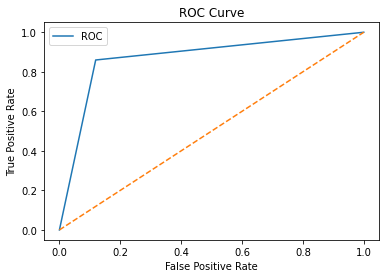

In [111]:
plt.plot(fpr,tpr,label='ROC')
plt.plot([0, 1],[0, 1],linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [112]:
auc_score=roc_auc_score(y_test,y_pred)
print(auc_score)

0.8702390691755295


### Choosing Decision Tree model as final model because it is showing the best r2 score ie.88% and auc score is also good ie. 87 % .

In [113]:
final_model = DecisionTreeClassifier(criterion='gini',min_samples_split=3,max_depth=10,max_leaf_nodes=7,min_samples_leaf=2)

In [114]:
final_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=7, min_samples_leaf=2,
                       min_samples_split=3)

In [115]:
import joblib

In [116]:
joblib.dump(final_model,'Fraud prediction Project')

['Fraud prediction Project']